# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix




### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
df = pd.read_csv('housing.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [3]:
df.drop('ocean_proximity', axis=1, inplace=True)
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

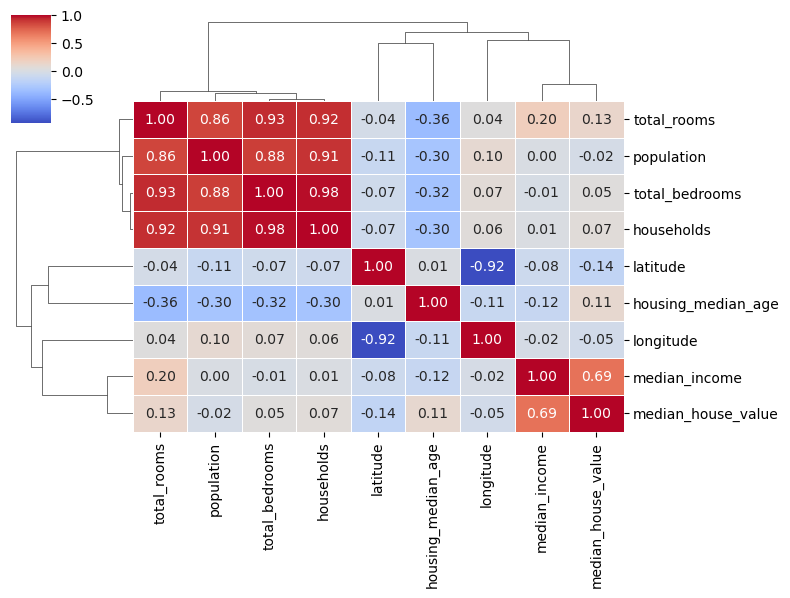

In [8]:
correlacao_matrix = df.corr()
sns.clustermap(correlacao_matrix,
               cmap="coolwarm",      
               annot=True,          
               fmt=".2f",            
               linewidths=0.5,      
               figsize=(8, 6))       
plt.show()

### 3. Separe os dados em validação e teste

In [9]:
# Separando a variavel resposta das preditoras 
target = df.loc[:,'median_house_value']
predict = df.loc[:,['total_rooms', 'population', 'total_bedrooms', 'households', 'median_income']]

X = predict
y = target

# Separando as variaveis em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
# Definindo limite de profundidade (divisão)
regressao_1 = DecisionTreeRegressor(max_depth = 2)
regressao_2 = DecisionTreeRegressor(max_depth = 8)

# Treinando o modelo
regressao_1.fit(X_train, y_train)
regressao_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [14]:
# Medindo a qualidade da previsão
mse_1_train = regressao_1.score(X_train, y_train)
mse_2_train = regressao_2.score(X_train, y_train)

mse_1_test = regressao_1.score(X_test, y_test)
mse_2_test = regressao_2.score(X_test, y_test)

#Formatação e exibição dos resultados
template_train = "O R-quadrado da árvore com profundidade={0} é: {1:.2f} (Treinamento)"
template_test = "O R-quadrado da árvore com profundidade={0} é: {1:.2f} (Teste)"

print(template_train.format(regressao_1.get_depth(),mse_1_train).replace(".",","))
print(template_train.format(regressao_2.get_depth(),mse_2_train).replace(".",","))
print(template_test.format(regressao_1.get_depth(),mse_1_test).replace(".",","))
print(template_test.format(regressao_2.get_depth(),mse_2_test).replace(".",","))


O R-quadrado da árvore com profundidade=2 é: 0,45 (Treinamento)
O R-quadrado da árvore com profundidade=8 é: 0,63 (Treinamento)
O R-quadrado da árvore com profundidade=2 é: 0,42 (Teste)
O R-quadrado da árvore com profundidade=8 é: 0,52 (Teste)


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A arvores com menor profundidade, apresenta uma maior porcentagem de acertos tanto no teste quanto no treinamento 

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

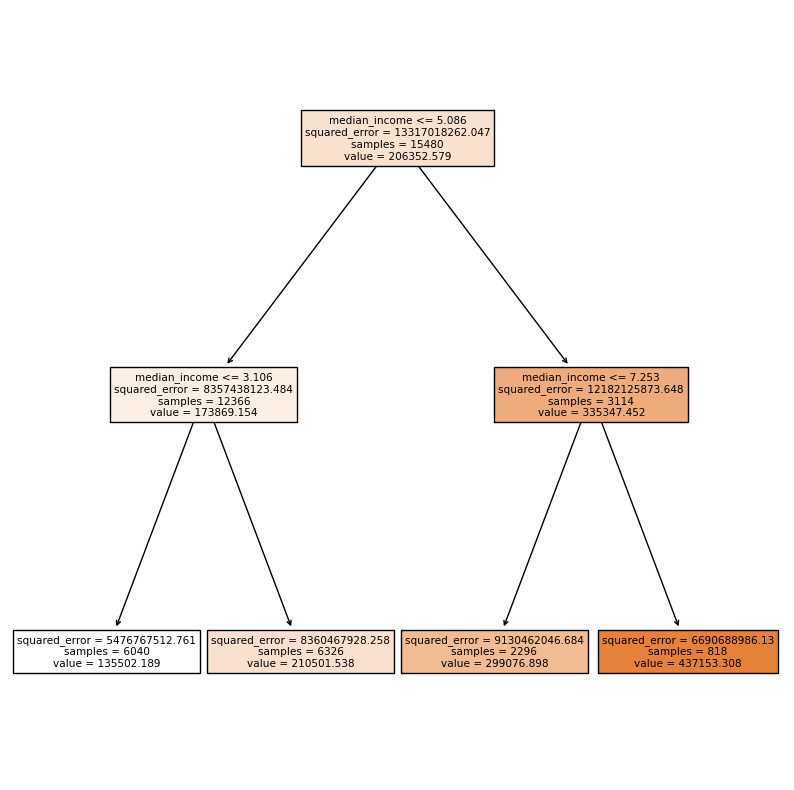

In [15]:
# Visualizando a arvore com plot_tree
plt.rc('figure', figsize = (10, 10))
tp = tree.plot_tree(regressao_1,
                   feature_names = X.columns,
                   filled = True)

Tentamos predizer o valor médio de uma casa com todas as variaveis preditoras 'X' ('total_rooms', 'population', 'total_bedrooms', 'households', 'median_income'), conseguimos chegar em um valor medio de 437153.308 para 818 amostragens com a renda media de 7.253 ou mais. O MSE está apresentando um erro muito grande, isso pode apresentar outliers. 